# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [21]:
import sys
import time

# Dependencies and Setup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [22]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
seen_cities = set()
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Number of latitude / longitude pairs to generate
num_lat_lngs = 1_500
# num_lat_lngs = 15  # For debugging API code, prevent running out of free calls

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=num_lat_lngs)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=num_lat_lngs)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1])

    # If the city is unique, then add it to a our cities list
    if city not in seen_cities:
        cities.append(city)
        seen_cities.add(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 598


---

## Requirements
1. Create Plots to Showcase the Relationship Between Weather Variables and Latitude
2. Compute Linear Regression for Each Relationship

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [23]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
    city_name = city.city_name
    
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL params for the city
    # city_url = f"{url}?lat={city.lat}&lon={city.lng}&appid={weather_api_key}"
    params = dict(
        lat=city.lat,
        lon=city.lng,
        units='imperial',  # Want imperial units (℉, miles/hr, etc.)
        appid=weather_api_key,
    )
    
    # Log the url, record, and set numbers
    print(f"Processing Record {record_count} of Set {set_count} | {city_name}")

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(url, params=params).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]  # Seconds since the epoch

        # Append the City information into city_data list
        city_data.append({
            "City": city.city_name,
            "Lat": city_lat,
            "Lng": city_lng,
            "Max Temp": city_max_temp,
            "Humidity": city_humidity,
            "Cloudiness": city_clouds,
            "Wind Speed": city_wind,
            "Country": city_country,
            "Date": city_date,
        })

    # If an error is experienced, skip the city
    except Exception as e:
        print("City not found. Skipping...")
        pass

    # throttle to avoid rate limiting
    time.sleep(0.1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | trang
Processing Record 2 of Set 1 | port-aux-francais
Processing Record 3 of Set 1 | kapa'a
Processing Record 4 of Set 1 | cadale
Processing Record 5 of Set 1 | thompson
Processing Record 6 of Set 1 | susuman
Processing Record 7 of Set 1 | nema
Processing Record 8 of Set 1 | mejit
Processing Record 9 of Set 1 | hotan
Processing Record 10 of Set 1 | ilulissat
Processing Record 11 of Set 1 | jutai
Processing Record 12 of Set 1 | badger
Processing Record 13 of Set 1 | pisco
Processing Record 14 of Set 1 | villanueva
Processing Record 15 of Set 1 | sorgun
Processing Record 16 of Set 1 | barmer
Processing Record 17 of Set 1 | amga
Processing Record 18 of Set 1 | tura
Processing Record 19 of Set 1 | puerto san carlos
Processing Record 20 of Set 1 | iqaluit
Processing Record 21 of Set 1 | lupane
Processing Record 22 of Set 1 | puerto ayora
Processing Record 23 of Set 1 | ingeniero jacobacci
Processing 

In [24]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          591
Lat           591
Lng           591
Max Temp      591
Humidity      591
Cloudiness    591
Wind Speed    591
Country       591
Date          591
dtype: int64

In [25]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,trang,7.5563,99.6114,82.31,78,20,2.30,TH,1722913341
1,port-aux-francais,-49.3492,70.2194,34.27,96,100,29.55,TF,1722912830
2,kapa'a,22.0752,-159.3190,81.48,67,25,7.00,US,1722913342
3,cadale,2.7603,46.3222,75.87,76,100,17.00,SO,1722913342
4,thompson,55.7433,-97.8635,66.38,48,75,3.44,CA,1722913204


In [26]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [27]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,trang,7.5563,99.6114,82.31,78,20,2.30,TH,1722913341
1,port-aux-francais,-49.3492,70.2194,34.27,96,100,29.55,TF,1722912830
2,kapa'a,22.0752,-159.3190,81.48,67,25,7.00,US,1722913342
3,cadale,2.7603,46.3222,75.87,76,100,17.00,SO,1722913342
4,thompson,55.7433,-97.8635,66.38,48,75,3.44,CA,1722913204


### Create the Scatter Plots Requested

**NOTE**: Requirements 1 and 2 are both satisfied with 1 image, which includes
a scatter plot with linear regression for each hemisphere and weather variable
(Max Temp, Humidity, Cloudiness, and Wind Speed).

Because `%matplotlib notebook` no longer works, a pair of helper functions has
been created to create a scatter plot with an integrated linear regression, and
another to leverage the first for each weather variable and hemisphere.  So a
generic function for scatter + regression plotting, and a specific one to
render the plots specific to weather variables and hemispheres.

In [37]:
# Generates a scatter plot with integrated linear regression plot to display
# both data and the line computed via linear regression.  Displays the r^2
# minimized during linear regression.
def plot_scatter_linregress(xs, ys, title, xlabel, ylabel):
    # Utility function to compute midpoint
    def midpoint(x1, x2):
        return (x1 + x2) / 2
    
    # Compute linear regression
    m, b, r, pvalue, stderr = linregress(xs, ys)
    regression_ys = xs * m + b
    
    # Format the linear regression equation for annotation, and prepare its
    # location on the chart.
    if b < 0:
        eq = f"$y = {m:0.2f}x - {abs(b):0.2f}$"
    else:
        eq = f"$y = {m:0.2f}x + {b:0.2f}$"
    eq_loc = midpoint(min(xs), max(xs)), midpoint(min(ys), max(ys))
    
    # Compute r^2, and prepare its label.
    r2 = r*r
    r2_text = f"The r^2 value is: {r2}"
    
    # Add the figure text for the annotation
    fig, ax = plt.subplots()
    # fig.text(1, 1, r2_text, ha='left', fontsize=12)

    # Scatter plot with xs and ys
    ax.scatter(xs, ys)
    
    # Line plot with xs and regression ys
    ax.plot(xs, regression_ys, 'r-')
    ax.annotate(eq, eq_loc, fontsize=15, color='red', alpha=0.5)
    
    # Label plot
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    
    # Label figure with R^2
    fig.text(0.03, 0.97, r2_text, ha='left', fontsize=12)


# Utility function to plot the DataFrame's scatter plot with linear regression
# line plot.  Takes a df with the data to plot, the hemisphere, y-axis field,
# y-axis label, and the figure number for the image output.  This is specific,
# hard-coding x to Latitude, and requires a hemisphere (North or South), y-axis
# field name (to locate dependent var in DataFrame), and a y-axis label to
# accurately label the chart.
def hemi_plot(df, hemi, yfield, ylabel, fig):
    # Get xs and ys for the plot
    xs, ys = df["Lat"], df[yfield]
    
    # Linear Regression Scatter plot of ys vs xs for each hemisphere
    plot_scatter_linregress(
        xs, ys,
        title=f"{hemi} Hemisphere Latitude vs {yfield}",
        xlabel="Latitude (°)",
        ylabel=ylabel,
    )
    
    # Save the figure
    plt.savefig(f"output_data/Fig{fig}.png")

    # Show plot
    plt.show()


In [38]:
# Build 2 DF views using loc, one for north hemisphere, another for south.
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0, :]
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0, :]

#### Latitude Vs. Max Temp

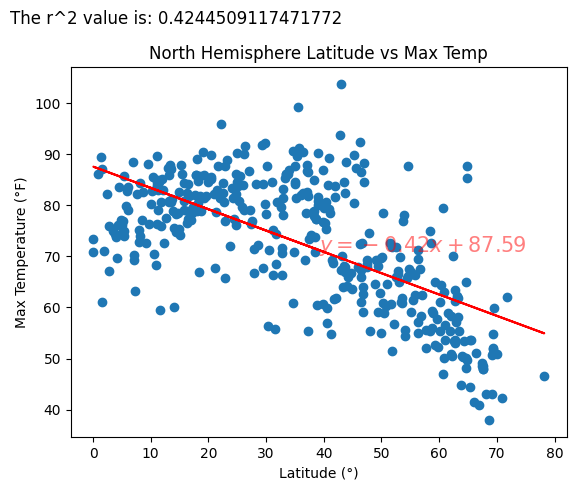

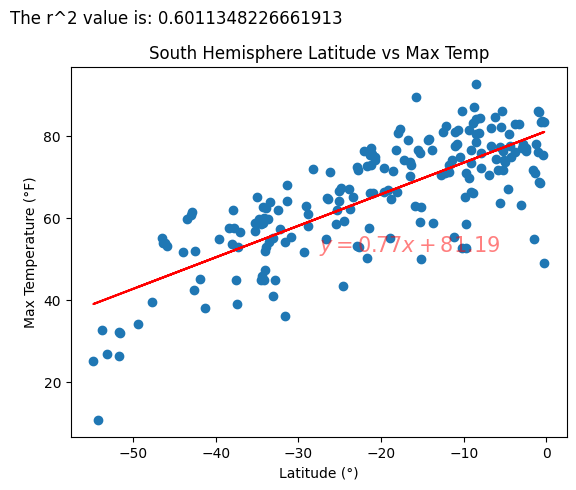

In [39]:
# Latitude vs Max Temp plots by hemisphere.
plots = [
    dict(df=northern_hemi_df, hemi="North",
         yfield="Max Temp", ylabel="Max Temperature (°F)",
         fig=1),
    dict(df=southern_hemi_df, hemi="South",
         yfield="Max Temp", ylabel="Max Temperature (°F)",
         fig=2),
]
for plot in plots:
    hemi_plot(**plot)

**Discussion about the linear relationship:** For both the Northern and Southern
hemispheres, there is a clear relationship between latitude and temperature.
It is a direct linear relationship.

#### Latitude Vs. Humidity


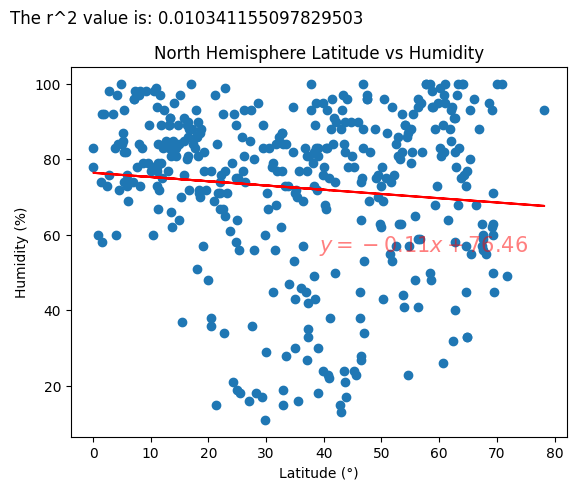

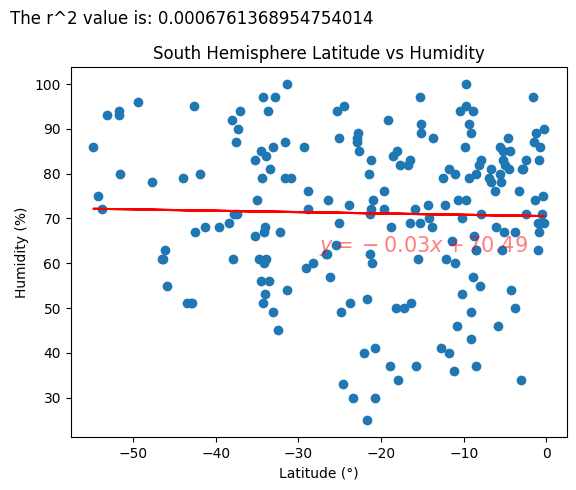

In [40]:
# Latitude vs Humidity plots by hemisphere.
plots = [
    dict(df=northern_hemi_df, hemi="North",
         yfield="Humidity", ylabel="Humidity (%)",
         fig=3),
    dict(df=southern_hemi_df, hemi="South",
         yfield="Humidity", ylabel="Humidity (%)",
         fig=4),
]
for plot in plots:
    hemi_plot(**plot)

**Discussion about the linear relationship:** While there may be a relationship
between latitude and humidity, the data seems to be too spread out for it to be
a strong correlation.  I believe there's little evidence to conclude that there
is a relationship.

#### Latitude Vs. Cloudiness

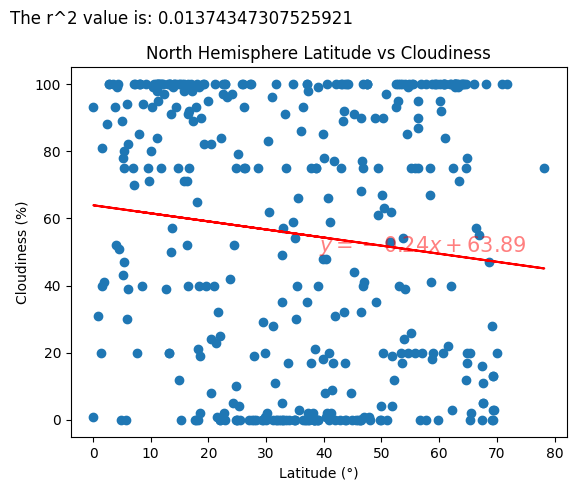

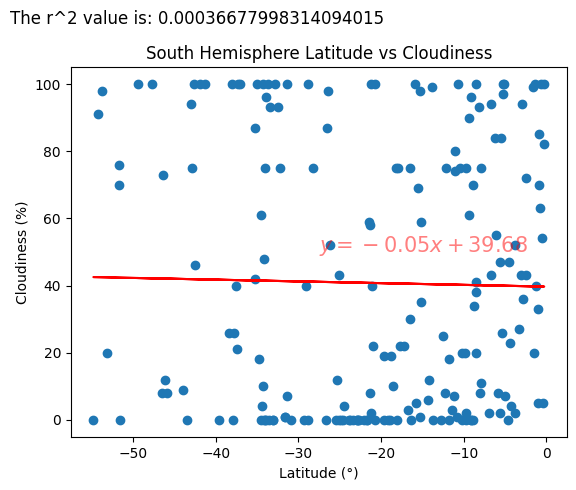

In [41]:
# Cloudiness vs Humidity plots by hemisphere.
plots = [
    dict(df=northern_hemi_df, hemi="North",
         yfield="Cloudiness", ylabel="Cloudiness (%)",
         fig=5),
    dict(df=southern_hemi_df, hemi="South",
         yfield="Cloudiness", ylabel="Cloudiness (%)",
         fig=6),
]
for plot in plots:
    hemi_plot(**plot)


**Discussion about the linear relationship:** There appears to be no
relationship between latitude and cloudiness.  Moreover, there appear to be
clusters of data around 0%, 100%, 20%, 40%, and 75% cloudiness that do not
respond at all to latitude, and might indicate either instrumental bias, or
value quantization.

#### Latitude vs. Wind Speed Plot

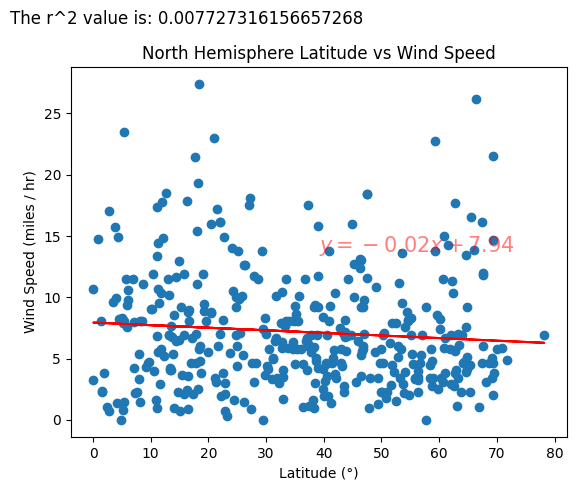

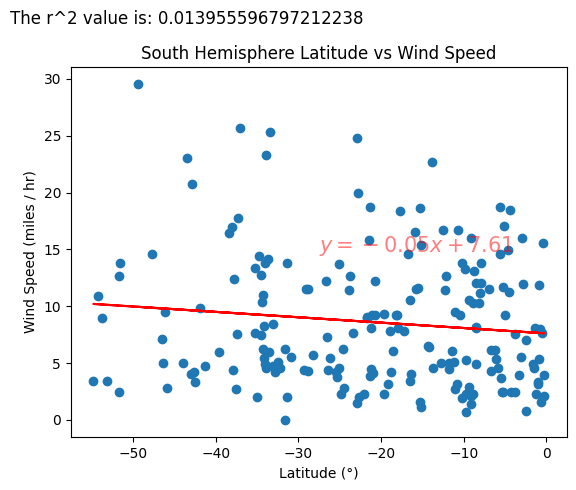

In [42]:
# Cloudiness vs Humidity plots by hemisphere.
plots = [
    dict(df=northern_hemi_df, hemi="North",
         yfield="Wind Speed", ylabel="Wind Speed (miles / hr)",
         fig=7),
    dict(df=southern_hemi_df, hemi="South",
         yfield="Wind Speed", ylabel="Wind Speed (miles / hr)",
         fig=8),
]
for plot in plots:
    hemi_plot(**plot)

**Discussion about the linear relationship:** There appears to be little to no
correlation between latitude and wind speed.  Perhaps this would benefit from
better visualization by taking into consideration not just speed, but velocity
(which has both magnitude and direction).